# LOADING

In [2]:
import piv_fun as piv
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import trange
from IPython.display import HTML

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
data = {}

# Load the images of pos3-2
directory = 'data/pos3-2/'
data['images'] = piv.read_image_directory(directory, image_type='tif', timing=True)

Reading images: 100%|██████████| 19835/19835 [00:19<00:00, 1033.65it/s]


In [5]:
# Load the processed data
directory = 'processed/'

# Get a list of all files in the directory
files = os.listdir(directory)

# Filter the list to include only files that start with pos3-2
files = [f for f in files if f.startswith('pos3-2')]

# Load the files into a dictionary of numpy arrays
for f in files:
    # Remove pos3-2_ and .npy from the filename to get the key
    key = f[7:-4]
    data[key] = np.load(directory + f)

In [6]:
# Load the calibration data
calib = np.load('data/calibration/pos3.npy')[0]

# PLOTTING

In [7]:
margins = [10, 496 - 480, 0, 0]
start_frame = 12000
frame_rate = 40000
velocity_conversion = frame_rate / 1000 / calib

# Get t=0, the point where the displacement first is non-zero
zero_frame = np.argmax(data['displ_av'].flatten() > 0.1 * velocity_conversion) - start_frame

# Or from the previous plots
zero_frame = 786

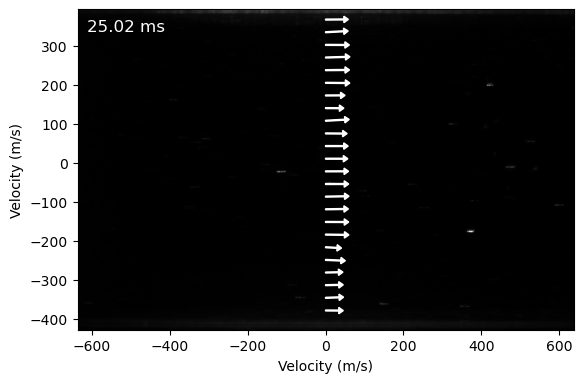

In [8]:
frame_no =  1001 + start_frame + zero_frame
background = data['images'][frame_no].astype(np.float32)
displacements = data['displ'][frame_no]
window_pos = data['window_pos']
# margins = [10, 0, 110, 0]

_, _ = piv.plot_flow_field(displacements, window_pos, background=background,
                    margins=margins, arrow_color='white', arrow_scale=1,  units='m/s',
                    zero_displ_thr=0.24, calib_dist=velocity_conversion, title=None, center_arrows=False, axis_labels=['Velocity', 'Velocity'],
                           time_stamp='{:.2f} ms'.format((frame_no - start_frame - zero_frame)/ frame_rate * 1000), right_axis_scale=2)

In [ ]:
len(data['displ_av'].flatten()) - start_frame

In [ ]:
fig, ax = plt.subplots()

for i in trange(-zero_frame, len(data['displ_av'].flatten()) - start_frame):
    frame_no = i + start_frame + zero_frame
    background = data['images'][frame_no].astype(np.float32)
    displacements = data['displ'][frame_no]
    window_pos = data['window_pos']
    # margins = [10, 0, 110, 0]

    fig, ax = piv.plot_flow_field(displacements, window_pos, background=background,
                        margins=margins, arrow_color='white', arrow_scale=5,  units='m/s',
                        zero_displ_thr=0.1, calib_dist=velocity_conversion, title=None, center_arrows=False, axis_labels=['Velocity', 'Velocity'],
                               time_stamp='{:.2f} ms'.format((frame_no - start_frame - zero_frame)/ frame_rate * 1000), right_axis_scale=2)
    
    # Save frame as jpg, formatting the number with 5 padding zeros
    fig.savefig(f'processed/video/frames_flow_png/flow_{i+zero_frame:05d}.png', format='png', bbox_inches='tight')
    
    plt.close()

In [10]:
fig, ax = plt.subplots(figsize=(4, 4.8))
time = (np.arange(data['displ_av'][start_frame:].shape[0]) - zero_frame) / frame_rate * 1000
velocity = data['displ_av'].flatten()[start_frame:] * velocity_conversion

for i in trange(4000, len(time)):
    ax.plot(time[:i], velocity[:i], c='C2')
    ax.set(xlim=[-20, 175], ylim=[-5, 55], xlabel='Time (ms)', ylabel='Av. horizontal velocity (m/s)')
    fig.savefig(f'processed/video/frames_velocity/velocity_{i:05d}.png', format='png', bbox_inches='tight')
    ax.clear()
    plt.close()

100%|██████████| 3834/3834 [02:07<00:00, 30.17it/s]


In [ ]:
plt.plot(time, velocity)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

grid = np.zeros((10,10),dtype=int)
fig1 = plt.figure(figsize=(8,8))

ax1 = fig1.add_subplot(1,1,1)
def animate(i):
    grid[i,i]=1
    ax1.imshow(grid)
    return 
ani = animation.FuncAnimation(fig1, animate,frames=10);

html = HTML(ani.to_jshtml())
display(html)
plt.close() # update